In [28]:
from GBM import Brownian
import matplotlib as mpl 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from GBM2 import Brownian as B2
from tqdm import tqdm
import math

100%|██████████| 100/100 [00:01<00:00, 86.17it/s]


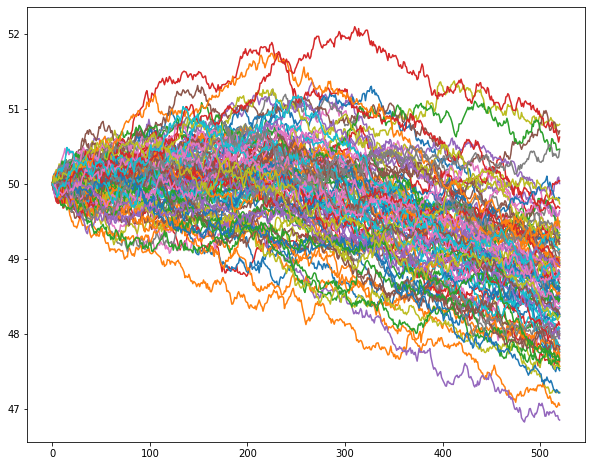

<AxesSubplot:ylabel='Count'>

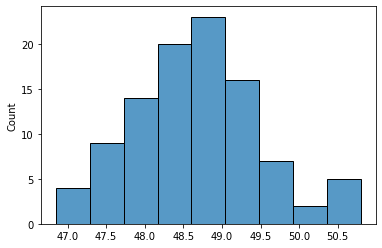

In [50]:
gbm2 = B2(s0 = 50)

def mu1(x):
    if x < 230:
        return 0.0001
    #elif 230 <= x < 300:
    #    return  (0.03/70)*(x-230) + 0.22
    else: 
        return -0.0009

def sin_mu(x):
    m = math.sin(x)*0.00045 
    return m

mu_fn = lambda x: mu1(x)
sigma_fn = lambda x: 0.0025

vals = []

fig, ax = plt.subplots(figsize=(10,8))

for i in tqdm(range(100)):
    S = gbm2.generate(mu_fn=mu_fn,sigma_fn=sigma_fn, dt=0.1, deltaT=52)
    plt.plot(S)
    vals.append(S[-1])
plt.show()
sns.histplot(vals)

In [41]:
50.027/50 * 100

100.054

-0.         -0.00312601 -0.00625202 -0.00937803 -0.01250405 -0.01563006

100%|██████████| 500/500 [00:04<00:00, 121.37it/s]


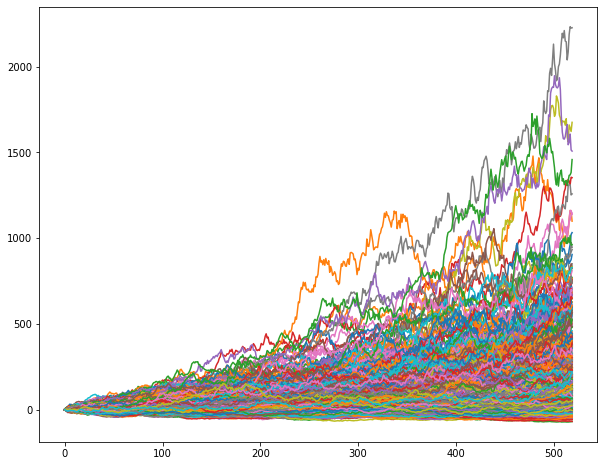

In [135]:
# Example on changing mu and sigma 
# Problems - with the current implmentation, a change in mu sigma vector means a change in price, this shouldnt nesscerily happen. Unelegent solution would be to shift the series at the point of drift. How would this be achieved for gradual drifts?

gbm = Brownian()

def mu1(x):
    if x < 230:
        return 0.22
    #elif 230 <= x < 300:
    #    return  (0.03/70)*(x-230) + 0.22
    else: 
        return 0.25

mu_fn = lambda x: 0.25
sigma_fn = lambda x: 0.68

fig, ax = plt.subplots(figsize=(10,8))

for i in tqdm(range(500)):
    pcx = gbm.stock_price(mu_fn=mu_fn, sigma_fn=sigma_fn)
    plt.plot(pcx)
plt.show()

[  0.          -0.47960609   1.12163267 ... 120.7007038  119.26465113
 118.51958778]


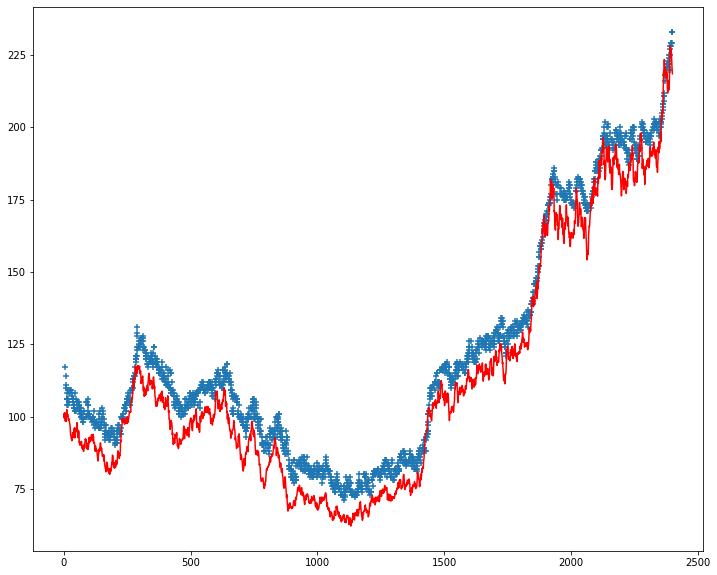

In [188]:
df = pd.read_csv('sess0001_transactions.csv', names=['trd','t','p'])
arr = np.load('./offset.npy')
print(arr)
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(df['t'],df['p'], marker='+')
plt.plot(arr+100, color='red')

In [194]:
df[100:110]

trd        t    p
100  Trd  139.700   96
101  Trd  143.275   96
102  Trd  143.313  102
103  Trd  145.700   96
104  Trd  148.100   97
105  Trd  148.288   98
106  Trd  150.612  100
107  Trd  150.650   99
108  Trd  150.900   98
109  Trd  150.950  103

In [195]:
arr[149]+100

89.01944624799263